# Partie modélisation du projet
On a décidé de cinder la partie et la partie modélisation des données

In [2]:
import pandas as pd
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from data_modelisation.data_modelisation import model_maker_tester
from sklearn.metrics import confusion_matrix, auc, roc_curve

In [3]:
df=pd.read_csv('data/final_data.csv')
df=df.astype('float')

In [4]:
df[['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time','Close_1n','Close_n1',
       'Quote asset volume', 'Number of trades', 'Taker buy base',
       'Taker buy quote', 'Ignore', 'clust']]

,Open time,Open,High,Low,Close,Volume,Close time,Close_1n,Close_n1,Quote asset volume,Number of trades,Taker buy base,Taker buy quote,Ignore,clust
0,20170817.0,4261.48,4485.39,4200.74,4285.08,795.150377,1.503014e+12,0.00,0.00,3.454770e+06,3427.0,616.248541,2.678216e+06,0.0,1.0
1,20170823.0,4040.00,4265.80,4013.89,4114.01,1001.136565,1.503533e+12,4040.00,4316.01,4.148686e+06,8629.0,309.419092,1.293567e+06,0.0,1.0
2,20170830.0,4564.52,4647.51,4416.01,4555.14,808.468771,1.504138e+12,4587.48,4724.89,3.683715e+06,5551.0,196.062252,8.946202e+05,0.0,1.0
3,20170902.0,4796.16,4939.19,4286.87,4472.14,929.148595,1.504397e+12,4834.91,4509.08,4.257724e+06,7475.0,379.199863,1.738334e+06,0.0,1.0
4,20170903.0,4508.50,4714.76,4298.33,4509.08,691.216198,1.504483e+12,4472.14,4100.11,3.121053e+06,6022.0,258.934536,1.169645e+06,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,20230512.0,26968.61,27091.12,25811.46,26795.01,67207.934940,1.683936e+12,26968.62,26775.28,1.777052e+09,1351633.0,33147.272510,8.764872e+08,0.0,3.0
902,20230513.0,26795.01,27045.45,26692.03,26775.28,22814.904210,1.684022e+12,26795.01,26917.62,6.120629e+08,605049.0,10959.299470,2.940389e+08,0.0,3.0
903,20230514.0,26775.27,27200.00,26560.53,26917.62,21594.803600,1.684109e+12,26775.28,27162.14,5.808017e+08,629537.0,10672.149830,2.870601e+08,0.0,3.0
904,20230515.0,26917.61,27663.59,26726.00,27162.14,40430.083330,1.684195e+12,26917.62,27033.84,1.104633e+09,935914.0,19301.246310,5.272376e+08,0.0,3.0


In [5]:
cat_cols=None
to_fit=['Open time', 'Open', 'High', 'Low','Close','Close_1n', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base',
       'Taker buy quote', 'Ignore', 'clust']
to_pred='Close'

model_maker_tester_api=model_maker_tester(cat_cols,to_fit,to_pred)


In [6]:
####################################  MLFLOW CONF  ####################################
from mlflow.tracking import MlflowClient
client = MlflowClient(tracking_uri="file:mlruns")
experiment_name = "BITCOIN"
experiment = client.get_experiment_by_name(experiment_name)

########################################################################################

In [7]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(1000,100,10),(20,30,40,50,70,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [8]:
import mlflow

In [10]:
mlflow.set_tracking_uri('http://localhost:8080')
model =MLPRegressor()
model_name = 'MLP Regressor'
data=df
version=0.1
param_grid=parameter_space
sav=model_maker_tester_api(model,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=True)

c:\Users\lenovo\Desktop\Cours\35_ML4DS\.env_mlds\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
54 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\Desktop\Cours\35_ML4DS\.env_mlds\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\Desktop\Cours\35_ML4DS\.env_mlds\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lenovo\Desktop\Cours\35_ML4DS

🏃 View run unequaled-goat-980 at: http://localhost:8080/#/experiments/785894109391607483/runs/334edd0a493b4657b0c4781211454766
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 0.1_MLP Regressor_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/cd17bcd1a7a344e3be6f1bd6b064775d
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


In [11]:
latest_run = client.search_runs(experiment_ids=[experiment.experiment_id], order_by=["start_time DESC"], max_results=1)[0]
model_uri = f"runs:/{latest_run.info.run_id}/MLP Regressor/"
model_to_predict=mlflow.sklearn.load_model(model_uri)

c:\Users\lenovo\Desktop\Cours\35_ML4DS\.env_mlds\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
model_sans_engineering=model_maker_tester_api(model_to_predict,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=False)

🏃 View run stylish-auk-976 at: http://localhost:8080/#/experiments/785894109391607483/runs/8289c5b27f914d2f86205691b27e1d0e
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 0.1_MLP Regressor_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/ff9a227e63554a7b855f4098c5cbf617
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


In [13]:
model_sans_engineering

(MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 30, 10), solver='sgd'),
 {'R2': -0.0029656998633160736,
  'RMSE': 14803.54966712568,
  'MAE': 11610.744007641622,
  'Precision': -0.0029656998633160736})

résultats : 
- 'R2': -0.0066944616507533805,
- 'RMSE': 14831.041984024074,
- 'MAE': 12216.275241658457,
- 'Precision': -0.0066944616507533805

**Très peu convaincants**

# Un peu de data featuring/engineering
On va ajouter quelques variables pour essayer de remonter les scores catastrophiques que l'on a

In [14]:
from sklearn.preprocessing import MinMaxScaler

#Fait par l'IA, rapide sans soucis niveau bug
# Convert 'Open time' to datetime
Date_open = pd.to_datetime(df['Open time'], format='%Y%m%d')

# Add new columns
df['Day of Week'] = Date_open.dt.day_name()
df['Day of Month'] = Date_open.dt.day
df['Month'] = Date_open.dt.month_name()

#Ajoute un scaler qui permet de mettre les valeurs des variables quantis entre 0 et 1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume','Quote asset volume','Close_n1','Close_1n', 'Number of trades', 'Taker buy base','Taker buy quote','Close']])
scaled_df = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low', 'Volume','Quote asset volume','Close_n1','Close_1n', 'Number of trades', 'Taker buy base','Taker buy quote','Close'])
df.update(scaled_df)

cat_cols=['clust', 'Day of Week', 'Day of Month',
       'Month']

# On enregistre les dummies pour de futures prédictions
df_dummies=pd.get_dummies(df,columns=cat_cols,drop_first=False)
df_dummies

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,20170817.0,0.017391,0.018473,0.017035,0.016499,0.000384,1.503014e+12,0.000080,0.000000,0.001195,...,False,False,False,False,False,False,False,False,False,False
1,20170823.0,0.013722,0.015068,0.013926,0.013839,0.000679,1.503533e+12,0.000120,0.000342,0.000322,...,False,False,False,False,False,False,False,False,False,False
2,20170830.0,0.022411,0.020986,0.020617,0.020699,0.000403,1.504138e+12,0.000093,0.000140,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,20170902.0,0.026249,0.025509,0.018468,0.019408,0.000576,1.504397e+12,0.000126,0.000266,0.000521,...,False,False,False,False,False,False,False,False,False,True
4,20170903.0,0.021483,0.022029,0.018659,0.019983,0.000235,1.504483e+12,0.000061,0.000170,0.000179,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,20230512.0,0.393565,0.368976,0.376635,0.366567,0.095418,1.683936e+12,0.101642,0.088580,0.093733,...,False,False,False,False,False,False,True,False,False,False
902,20230513.0,0.390689,0.368268,0.391287,0.366260,0.031893,1.684022e+12,0.034931,0.039528,0.030617,...,False,False,False,False,False,False,True,False,False,False
903,20230514.0,0.390362,0.370664,0.389099,0.368473,0.030147,1.684109e+12,0.033140,0.041137,0.029800,...,False,False,False,False,False,False,True,False,False,False
904,20230515.0,0.392720,0.377852,0.391853,0.372276,0.057100,1.684195e+12,0.063137,0.061267,0.054347,...,False,False,False,False,False,False,True,False,False,False


In [15]:
cat_cols=['clust', 'Day of Week', 'Day of Month',
       'Month']
to_fit=['Quote asset volume', 'Number of trades', 'Taker buy base',
       'Taker buy quote','Close','Close_1n', 'clust_1.0', 'clust_2.0', 'clust_3.0',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Day of Month_1', 'Day of Month_2',
       'Day of Month_3', 'Day of Month_4', 'Day of Month_5', 'Day of Month_6',
       'Day of Month_7', 'Day of Month_8', 'Day of Month_9', 'Day of Month_10',
       'Day of Month_11', 'Day of Month_12', 'Day of Month_13',
       'Day of Month_14', 'Day of Month_15', 'Day of Month_16',
       'Day of Month_17', 'Day of Month_18', 'Day of Month_19',
       'Day of Month_20', 'Day of Month_21', 'Day of Month_22',
       'Day of Month_23', 'Day of Month_24', 'Day of Month_25',
       'Day of Month_26', 'Day of Month_27', 'Day of Month_28',
       'Day of Month_29', 'Day of Month_30', 'Day of Month_31', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']
to_pred='Close_n1'
model_maker_tester_api=model_maker_tester(cat_cols,to_fit,to_pred)

model =MLPRegressor()
model_name = 'MLP Regressor_with_engineering'
data=df
version=2.2
param_grid=parameter_space
sav=model_maker_tester_api(model,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=True)

c:\Users\lenovo\Desktop\Cours\35_ML4DS\.env_mlds\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


🏃 View run adorable-doe-722 at: http://localhost:8080/#/experiments/785894109391607483/runs/f0732a34152644e290eddb214b409e68
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 2.2_MLP Regressor_with_engineering_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/4a2af798e09144329df72b7a81afb5a5
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


In [16]:
latest_run = client.search_runs(experiment_ids=[experiment.experiment_id], order_by=["start_time DESC"], max_results=1)[0]
model_uri = f"runs:/{latest_run.info.run_id}/MLP Regressor_with_engineering/"
model_to_predict=mlflow.sklearn.load_model(model_uri)
know=model_maker_tester_api(model_to_predict,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=False)
know

🏃 View run rebellious-roo-961 at: http://localhost:8080/#/experiments/785894109391607483/runs/40d4d4455b574266bee97d97c15bd367
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 2.2_MLP Regressor_with_engineering_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/61cdbd58a6ed4009b1b98f6e2740d140
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


(MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 30, 10), solver='sgd'),
 {'R2': 0.3707196287053842,
  'RMSE': 0.1751221873064445,
  'MAE': 0.1358103383490494,
  'Precision': 0.3707196287053842})

In [17]:
df['MLP_Regressor_pred']=know[0].predict(df_dummies[to_fit])

Résultats :
- 'R2': 0.4642677093973947,
- 'RMSE': 0.16158200478263618,
- 'MAE': 0.12987705475997963,
- 'Precision': 0.4642677093973947

**Déjà plus convaincant**

# On change le model et la variable à prédire
On va faire un delta, le but sera alors de prédire si le prix va monter ou non

In [18]:
#Fais une fonction qui prend en argument un dataframe et une variable sour forme str, 
# la fonction retournera un array de la même longueur que le dataframe avec comme valeur 0 ou 1 dépendament 
# que la variable indiquée en argument ai augmenté depuis l'enregistrement d'avant ou non
import numpy as np

def variable_increase(df, variable):
    result = np.zeros(len(df))
    result[1:] = np.where(df[variable][1:].values > df[variable][:-1].values, 1, 0)
    return result

# Exemple d'utilisation
increase_array = variable_increase(df, 'Close_n1')
df['Close increase'] = increase_array

In [19]:
cat_cols=['clust', 'Day of Week', 'Day of Month',
       'Month']
to_fit=['Quote asset volume', 'Number of trades', 'Taker buy base','Close_1n','Close',
       'Taker buy quote', 'clust_1.0', 'clust_2.0', 'clust_3.0',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Day of Month_1', 'Day of Month_2',
       'Day of Month_3', 'Day of Month_4', 'Day of Month_5', 'Day of Month_6',
       'Day of Month_7', 'Day of Month_8', 'Day of Month_9', 'Day of Month_10',
       'Day of Month_11', 'Day of Month_12', 'Day of Month_13',
       'Day of Month_14', 'Day of Month_15', 'Day of Month_16',
       'Day of Month_17', 'Day of Month_18', 'Day of Month_19',
       'Day of Month_20', 'Day of Month_21', 'Day of Month_22',
       'Day of Month_23', 'Day of Month_24', 'Day of Month_25',
       'Day of Month_26', 'Day of Month_27', 'Day of Month_28',
       'Day of Month_29', 'Day of Month_30', 'Day of Month_31', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']
to_pred='Close increase'
model_maker_tester_api=model_maker_tester(cat_cols,to_fit,to_pred)

model =MLPClassifier()
model_name = 'MLP Classifier_with_engineering'
data=df
version=2.3
param_grid=parameter_space
sav=model_maker_tester_api(model,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=True)

🏃 View run colorful-pig-599 at: http://localhost:8080/#/experiments/785894109391607483/runs/91413743791d44aca579dddc2bf56e94
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 2.3_MLP Classifier_with_engineering_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/c11fc4ca36054987a3d89b416a126840
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


In [20]:
latest_run = client.search_runs(experiment_ids=[experiment.experiment_id], order_by=["start_time DESC"], max_results=1)[0]
model_uri = f"runs:/{latest_run.info.run_id}/MLP Classifier_with_engineering/"
model_to_predict=mlflow.sklearn.load_model(model_uri)

model_classifier=model_maker_tester_api(model_to_predict,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=False)
model_classifier

🏃 View run trusting-bat-938 at: http://localhost:8080/#/experiments/785894109391607483/runs/8a7fd7c19ca146b79bc00df3bbec1239
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 2.3_MLP Classifier_with_engineering_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/68355f9209104afdb4ab31a089fda15c
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


(MLPClassifier(alpha=0.05, hidden_layer_sizes=(10, 30, 10), solver='sgd'),
 {'R2': -0.8674650424973562,
  'RMSE': 0.6816743443168294,
  'MAE': 0.46467991169977924,
  'Precision': 0.5353200883002207})

In [21]:
df['MLPclassifier_pred']=model_classifier[0].predict(df_dummies[to_fit])

In [22]:
print(confusion_matrix(df['Close increase'], model_classifier[0].predict(df_dummies[to_fit])))
print(model_classifier[0].score(df_dummies[to_fit], df['Close increase']))

[[  2 420]
 [  1 483]]
0.5353200883002207


In [23]:
y=df['Close increase']
pred=model_classifier[0].predict(df_dummies[to_fit])

In [24]:
from sklearn.metrics import f1_score
f1_score(y, pred)

0.6964671953857245

Résultats :
- 'R2': -0.796492499314559,
- 'RMSE': 0.6685954438594903,
- 'MAE': 0.4470198675496689,
- 'Precision': 0.5529801324503312
- 'f1_score' : 0.6833578792341679

**On a alors un score de 1% au dessus de l'aléatoire.**

C'est pas excellent. Le R2 est aberrant. Notre précision à bien augmentée. Le f1 score est très convaincant.

# Et si on essayait un logit classique ?

from skl

In [25]:
from sklearn.linear_model import LogisticRegression
df_dummies['Close increase']=df['Close increase']

In [26]:
minimum=1000000
Logit=LogisticRegression()
Logit.fit(df_dummies[to_fit],df_dummies['Close increase'])

LogisticRegression()

In [27]:
Conf_Mat=confusion_matrix(df_dummies['Close increase'], Logit.predict(df_dummies[to_fit]))
print(Conf_Mat)
print('Accuracy :',Logit.score(df_dummies[to_fit], df_dummies['Close increase']))
print('F1_score :',f1_score(df['Close increase'], Logit.predict(df_dummies[to_fit])))

[[188 234]
 [144 340]]
Accuracy : 0.5827814569536424
F1_score : 0.6427221172022685


In [28]:
df['Logit_prediction']=Logit.predict(df_dummies[to_fit])

Comme quoi un bon vieux logit marche toujours

# Et les arabes de décision dans tout ça ?

In [29]:
cat_cols=['clust', 'Day of Week', 'Day of Month',
       'Month']
to_fit=['Quote asset volume', 'Number of trades', 'Taker buy base','Close','Close_1n',
       'Taker buy quote', 'clust_1.0', 'clust_2.0', 'clust_3.0',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Day of Month_1', 'Day of Month_2',
       'Day of Month_3', 'Day of Month_4', 'Day of Month_5', 'Day of Month_6',
       'Day of Month_7', 'Day of Month_8', 'Day of Month_9', 'Day of Month_10',
       'Day of Month_11', 'Day of Month_12', 'Day of Month_13',
       'Day of Month_14', 'Day of Month_15', 'Day of Month_16',
       'Day of Month_17', 'Day of Month_18', 'Day of Month_19',
       'Day of Month_20', 'Day of Month_21', 'Day of Month_22',
       'Day of Month_23', 'Day of Month_24', 'Day of Month_25',
       'Day of Month_26', 'Day of Month_27', 'Day of Month_28',
       'Day of Month_29', 'Day of Month_30', 'Day of Month_31', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']
to_pred='Close increase'
model_maker_tester_api=model_maker_tester(cat_cols,to_fit,to_pred)

model =DecisionTreeClassifier()
model_name = 'Decision_tree_classifier_engineered'
data=df
version=2.4
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
sav=model_maker_tester_api(model,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=True)

🏃 View run adaptable-seal-864 at: http://localhost:8080/#/experiments/785894109391607483/runs/b725baf75b9341bdb743781a63b17f47
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 2.4_Decision_tree_classifier_engineered_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/a21ce9f0591e4a0bbce6e59183c35dc5
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


In [30]:
latest_run = client.search_runs(experiment_ids=[experiment.experiment_id], order_by=["start_time DESC"], max_results=1)[0]
model_uri = f"runs:/{latest_run.info.run_id}/Decision_tree_classifier_engineered"
model_to_predict=mlflow.sklearn.load_model(model_uri)

model_classifier=model_maker_tester_api(model_to_predict,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=False)
df['DecisionTreeClassifier_pred']=model_classifier[0].predict(df_dummies[to_fit])
model_classifier

🏃 View run redolent-sponge-914 at: http://localhost:8080/#/experiments/785894109391607483/runs/f0addc2bd5e54b6d914c41a2e057e506
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 2.4_Decision_tree_classifier_engineered_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/7538780505b54244a04203a3df39756b
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


(DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4),
 {'R2': -0.605753789510791,
  'RMSE': 0.6321063983984399,
  'MAE': 0.3995584988962472,
  'Precision': 0.6004415011037527})

In [31]:
cat_cols=['clust', 'Day of Week', 'Day of Month',
       'Month']
to_fit=['Quote asset volume', 'Number of trades', 'Taker buy base',
       'Taker buy quote', 'clust_1.0', 'clust_2.0', 'clust_3.0',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Day of Month_1', 'Day of Month_2',
       'Day of Month_3', 'Day of Month_4', 'Day of Month_5', 'Day of Month_6',
       'Day of Month_7', 'Day of Month_8', 'Day of Month_9', 'Day of Month_10',
       'Day of Month_11', 'Day of Month_12', 'Day of Month_13',
       'Day of Month_14', 'Day of Month_15', 'Day of Month_16',
       'Day of Month_17', 'Day of Month_18', 'Day of Month_19',
       'Day of Month_20', 'Day of Month_21', 'Day of Month_22',
       'Day of Month_23', 'Day of Month_24', 'Day of Month_25',
       'Day of Month_26', 'Day of Month_27', 'Day of Month_28',
       'Day of Month_29', 'Day of Month_30', 'Day of Month_31', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September']
to_pred='Close'
model_maker_tester_api=model_maker_tester(cat_cols,to_fit,to_pred)

model =DecisionTreeRegressor()
model_name = 'Decision_tree_regressor_engineered'
data=df
version=2.5
param_grid = {
    'criterion': ['squared_error', 'poisson', 'friedman_mse', 'absolute_error'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
sav=model_maker_tester_api(model,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=True)

c:\Users\lenovo\Desktop\Cours\35_ML4DS\.env_mlds\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


🏃 View run nosy-whale-221 at: http://localhost:8080/#/experiments/785894109391607483/runs/dd6d7a1b28134bb19827ab420a758575
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 2.5_Decision_tree_regressor_engineered_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/147719bd5af143c99b176af65b1c66b8
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


In [32]:
latest_run = client.search_runs(experiment_ids=[experiment.experiment_id], order_by=["start_time DESC"], max_results=1)[0]
model_uri = f"runs:/{latest_run.info.run_id}/Decision_tree_regressor_engineered"
model_to_predict=mlflow.sklearn.load_model(model_uri)

model_classifier=model_maker_tester_api(model_to_predict,model_name,data,version,param_grid,experience_name='BITCOIN',flg_first=False)
df['DecisionTreeRegressor_pred']=model_classifier[0].predict(df_dummies[to_fit])
model_classifier

🏃 View run polite-wolf-699 at: http://localhost:8080/#/experiments/785894109391607483/runs/0d2b8b66a59941fb9c9aa7543b48d0fc
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483
🏃 View run 2.5_Decision_tree_regressor_engineered_2025_01_13 at: http://localhost:8080/#/experiments/785894109391607483/runs/3e67ee2c56664fc7a2181345a5d246b3
🧪 View experiment at: http://localhost:8080/#/experiments/785894109391607483


(DecisionTreeRegressor(max_depth=3),
 {'R2': 0.8275007676966493,
  'RMSE': 0.09547600163036173,
  'MAE': 0.062075381236736435,
  'Precision': 0.8275007676966493})

Alors la, l'arbre de décision a de très bonnes prédiction !

Bientot la richesse !

# Visualisation
On va maintenant visualiser les prédiction des différents modèles

In [33]:
from matplotlib import pyplot as plt

In [34]:
df.to_csv('data/predictions.csv',index=False)

In [41]:
df=pd.read_csv('data/predictions.csv')
Pred_augmentation = ['Close time','Close_n1','Close_1n','Close','MLP_Regressor_pred','DecisionTreeRegressor_pred']
# Inverse transform the scaled values to their original values

Pred_prix=['Close time','Close','MLP_Regressor_pred','DecisionTreeRegressor_pred']

for i in Pred_prix[1:]:
    df[['Open', 'High', 'Low', 'Volume','Quote asset volume','Close_n1','Close_1n', 'Number of trades', 'Taker buy base','Taker buy quote',i]]=scaler.inverse_transform(df[['Open', 'High', 'Low', 'Volume','Quote asset volume','Close_n1','Close_1n', 'Number of trades', 'Taker buy base','Taker buy quote',i]])

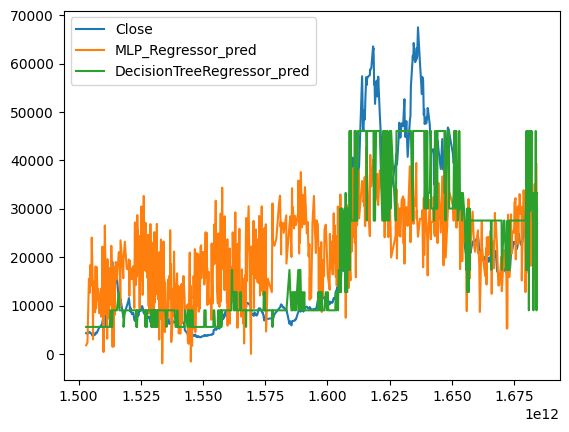

In [43]:
Pred_augmentation = ['Close time','Close','MLP_Regressor_pred','DecisionTreeRegressor_pred']

for col in Pred_augmentation[1:]:
    plt.plot(df['Close time'], df[col], label=col)

plt.legend()